### 使用3$\sigma$法则定上界, 超出界限的点看作异常，转换为前10个点的最值

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 1 columns):
true    4032 non-null int64
dtypes: int64(1)
memory usage: 31.6 KB


true    1669
dtype: int64

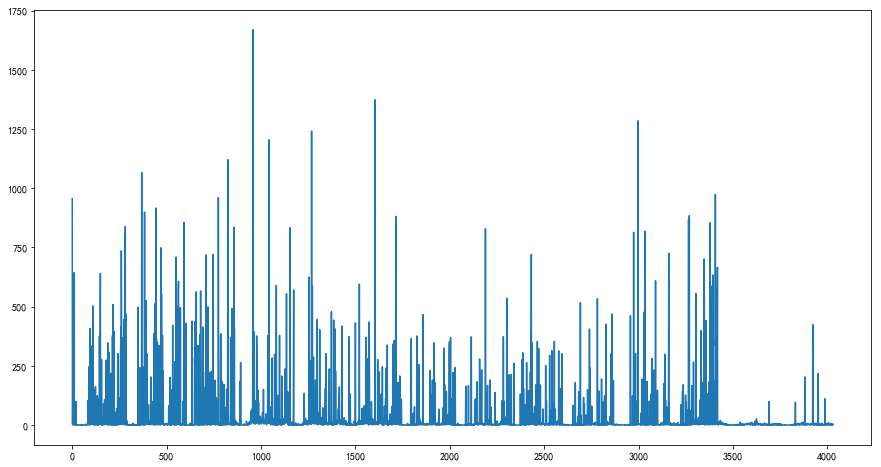

In [2]:
source_data = pd.read_csv('i38&e12&c1&p05&l3.csv', usecols=[0])
source_data.info()
source_data.describe()
plt.figure(figsize=(15, 8))
plt.plot(source_data)
source_data.max()

In [3]:
# source_data.max()
source_series = source_data.values
source_series.max()

1669

In [4]:
def source2normal(ts):
    abnormal_points = []
    smoothed_points = []
    
    miu = np.mean(ts)
    sigma = np.std(ts)
    L = 3
    UCL = miu + L * sigma
    print(UCL)
    print("miu = %f" % miu)
    print("sigma = %f" % sigma)
    print("Upper Control Line = %f" % UCL)
    for i in range(len(ts)):
        if ts[i] > UCL:
            abnormal_points.append(i)
            # 列表切片是左闭右开区间，且倒序的右开区间最小等于0.索引大于10的取前面10个元素的最值，小于10的取前面所有元素的最值。
            if i == 0:
                ts[i] = min(np.max(ts[1:11]), int(UCL))
            elif i > 10:
                ts[i] = np.max(ts[i-1:i-11:-1])
            else:
                ts[i] = np.max(ts[i-1::-1])
            smoothed_points.append(ts[i])
    return ts, abnormal_points, smoothed_points

[956, 3, 4, 165, 0, 0, 4, 146, 10, 2]
397.95561826439587
miu = 37.888889
sigma = 120.022243
Upper Control Line = 397.955618
[0, 10, 95, 109, 148, 149, 215, 216, 258, 260, 261, 275, 278, 281, 284, 349, 368, 383, 392, 438, 444, 470, 473, 532, 550, 551, 556, 559, 562, 563, 573, 591, 603, 635, 651, 657, 680, 692, 708, 719, 745, 774, 824, 847, 857, 859, 957, 958, 1042, 1043, 1081, 1135, 1153, 1173, 1254, 1268, 1272, 1298, 1311, 1373, 1385, 1392, 1428, 1500, 1521, 1573, 1604, 1714, 1716, 1858, 2189, 2302, 2432, 2692, 2740, 2782, 2827, 2860, 2957, 2974, 2997, 3030, 3033, 3090, 3160, 3265, 3269, 3304, 3332, 3348, 3358, 3379, 3384, 3392, 3395, 3407, 3413, 3417, 3418, 3923]
[397, 397, 246, 335, 376, 376, 378, 378, 349, 349, 349, 268, 268, 268, 268, 2, 242, 245, 245, 388, 388, 80, 80, 149, 267, 267, 267, 267, 267, 267, 267, 101, 152, 5, 283, 283, 382, 10, 159, 185, 228, 108, 152, 370, 370, 370, 189, 189, 378, 378, 298, 237, 29, 338, 18, 273, 273, 190, 54, 17, 48, 61, 23, 116, 20, 207, 16, 357, 35

397

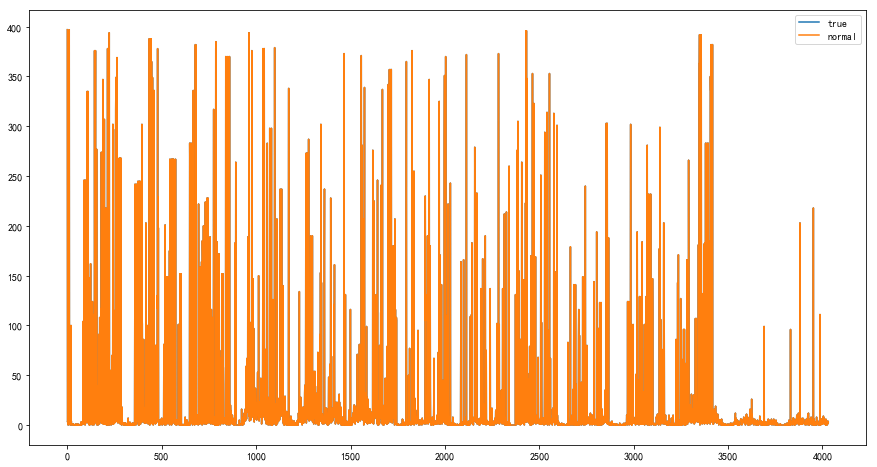

In [5]:
source_series = [int(i) for i in source_series]
print(source_series[:10])
normal_series, abnormal_points, smoothed_points = source2normal(source_series)
print(abnormal_points)
print(smoothed_points)
plt.figure(figsize=(15,8))
plt.plot(source_series, label='true')
plt.plot(normal_series, label='normal')
plt.legend(loc='best')
np.max(normal_series)

In [6]:
length = len(normal_series)
normal_set = {}
normal_set['TRUE'] = [ int(i) for i in normal_series]
normal_set['pred'] = [0] * length
# df = pd.DataFrame(normal_set)
# df.to_csv()